In [18]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole


#IPythonConsole.ipython_useSVG=False

In [9]:
df = pd.read_csv('../../data/molecules/ames.csv.zip', index_col=0)

In [10]:
df

,ID,class,Smiles
0,2475-33-4,0,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...
1,105149-00-6,0,CC(=O)OC1(C(C)=O)CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)...
2,108-78-1,0,Nc1nc(N)nc(N)n1
3,2425-85-6,1,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c([N+](=O)[O-])c1
4,67019-24-3,0,CC(C)CC(=O)Nc1snc2ccccc12
...,...,...,...
6501,37319-17-8,0,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...
6502,117333-21-8,1,O=Nn1cc(CC(O)C(=O)O)c2ccccc21
6503,10605-21-7,1,COC(=O)Nc1nc2ccccc2[nH]1
6504,103393-71-1,1,ClCc1cccc2c1-c1cccc3cccc-2c13


In [11]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')

,ID,class,Smiles,ROMol
0,2475-33-4,0,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,
1,105149-00-6,0,CC(=O)OC1(C(C)=O)CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)...,
2,108-78-1,0,Nc1nc(N)nc(N)n1,
3,2425-85-6,1,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c([N+](=O)[O-])c1,
4,67019-24-3,0,CC(C)CC(=O)Nc1snc2ccccc12,
...,...,...,...,...
6501,37319-17-8,0,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,
6502,117333-21-8,1,O=Nn1cc(CC(O)C(=O)O)c2ccccc21,
6503,10605-21-7,1,COC(=O)Nc1nc2ccccc2[nH]1,
6504,103393-71-1,1,ClCc1cccc2c1-c1cccc3cccc-2c13,

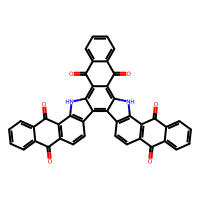
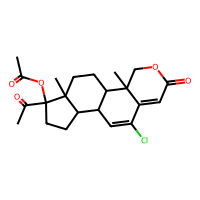
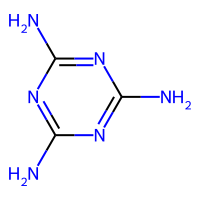
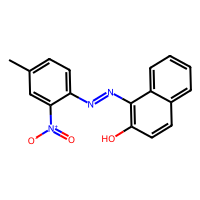
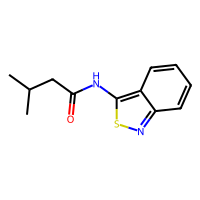
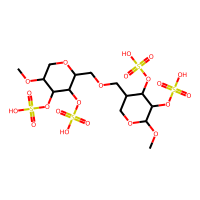
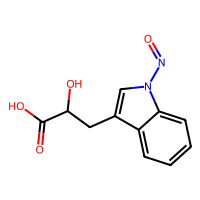
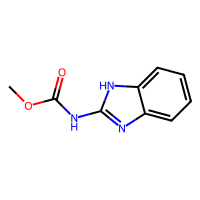
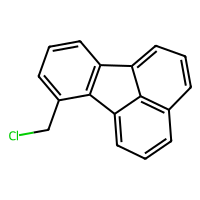
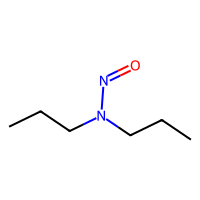

In [16]:
df

In [17]:
df.value_counts('class')

class
1    3497
0    3009
Name: count, dtype: int64

In [22]:

from rdkit import DataStructs
from rdkit.Chem import AllChem

def get_cfps(mol, radius=1, nBits=1024, useFeatures=False, counts=False, dtype=np.int8):
    """Calculates circural (Morgan) fingerprint.  
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints  
    
    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float 
        Fingerprint radius, default 2
    nBits : int 
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool  
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    dtype : np.dtype
        Numpy data type for the array.
    
    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)
    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return arr

In [23]:
get_cfps(df.iloc[0]['ROMol'])

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [28]:
df = df.join(pd.DataFrame([get_cfps(row[1]['ROMol']) for row in df.iterrows()], columns=[f'bit_{x}' for x in range(1024)]))

In [29]:
df

,ID,class,Smiles,ROMol,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,...,bit_1014,bit_1015,bit_1016,bit_1017,bit_1018,bit_1019,bit_1020,bit_1021,bit_1022,bit_1023
0,2475-33-4,0,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,<rdkit.Chem.rdchem.Mol object at 0x177ee5d20>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,105149-00-6,0,CC(=O)OC1(C(C)=O)CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)...,<rdkit.Chem.rdchem.Mol object at 0x177ee5d90>,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,108-78-1,0,Nc1nc(N)nc(N)n1,<rdkit.Chem.rdchem.Mol object at 0x177ee5e00>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2425-85-6,1,Cc1ccc(N=Nc2c(O)ccc3ccccc23)c([N+](=O)[O-])c1,<rdkit.Chem.rdchem.Mol object at 0x177ee5e70>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67019-24-3,0,CC(C)CC(=O)Nc1snc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x177ee5ee0>,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,37319-17-8,0,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,<rdkit.Chem.rdchem.Mol object at 0x28a91c740>,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6502,117333-21-8,1,O=Nn1cc(CC(O)C(=O)O)c2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x28a91c7b0>,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6503,10605-21-7,1,COC(=O)Nc1nc2ccccc2[nH]1,<rdkit.Chem.rdchem.Mol object at 0x28a91c820>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6504,103393-71-1,1,ClCc1cccc2c1-c1cccc3cccc-2c13,<rdkit.Chem.rdchem.Mol object at 0x28a91c890>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier()

In [32]:
clf.fit(df[[f'bit_{x}' for x in range(1024)]], df['class'])

RandomForestClassifier()

In [36]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [54]:
df['class'].values

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
clf.predict_proba(df[[f'bit_{x}' for x in range(1024)]])[:,0]

array([0.77166667, 0.9       , 0.91      , ..., 0.16      , 0.04      ,
       0.        ])

In [56]:
roc_auc_score(df['class'].values, clf.predict_proba(df[[f'bit_{x}' for x in range(1024)]])[:,1])

0.9991397934687026